# Analytical sphere solutions

## Variables and packages

In [5]:
%matplotlib inline
#load packages
import numpy as np
from fluid_sphere import *
import time
import pandas as pd
import seaborn as sns

#radius
a = 0.01

#frequencies
freqs = np.arange(1,420,1)*1000
f = 200 * 1000

# for fluid-like sphere
Range = 10
Radius = 0.01
Theta = 1.571
g = 1028.9 / 1026.8 #1.0025
h = 1480.3 / 1477.4 #1.0025

#define densities
rho_w =1026.8
rho_gas = 1.24
rho_shell_gas = 1070
rho_shell_prel = 1028.9
rho_shell_weak = 1028.9
rho_int_weak = 1031.0
rho_weak = 1028.9

#define sound speeds
c_w =1477.4
c_gas = 345.0
c_shell_gas = 1570.0
c_shell_prel = 1480.3
c_shell_weak = 1480.3
c_int_weak = 1483.3
c_weak = 1480.3


#define variable for frequency and length range simulations
freqs_low = np.arange(10,300,0.5)*1000
radii = np.arange(1,20,0.5)/100
fs = np.repeat(freqs_low, len(radii))
rs = np.tile(radii, len(freqs_low))

### Define simulation functions

In [6]:
def ts_sim():
    start = time.perf_counter()    
    #vertorise and simulate
    tsmap = np.vectorize(ts_map)(fs, rs)
    end = time.perf_counter()
    tel_sim = end - start
    print("Evaluating the TS took %.2f seconds for %i simulations"%(tel_sim, len(tsmap)))

    #create pandas dataframe
    dataset = pd.DataFrame({'Frequency':fs/1000,'Radius':rs*100,'TS':tsmap})
    df = dataset.pivot_table(index='Radius', columns='Frequency', values='TS', aggfunc=np.median)

    # create heatmap
    plt.figure(figsize=(16, 6))
    p =sns.heatmap(df, annot=False, 
                   cmap=sns.cubehelix_palette(8, start=.5, rot=-.75, reverse=True, as_cmap=True))
    ylabels = ['{:,.1f}'.format(x) for x in p.get_yticks()]
    p.set_yticklabels(ylabels)
    p.set(xlabel='Frequency [kHz]', ylabel='Radius [cm]')
    return(p,tel_sim)

## Fluid-like

TS Anderson (1950) - Evaluating the TS took 0.44 seconds for 419 simulations
TS Jech et al.(2015) - Evaluating the TS took 0.33 seconds for 419 simulations


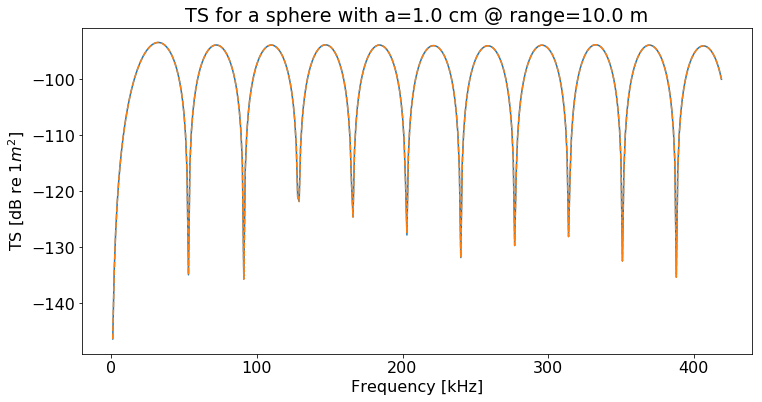

In [7]:
#set plotting parameters
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

#Run the TS simulations

#single frequency
start = time.perf_counter()
TS_py = fluid_sphere(f=f,Radius=Radius, Range=Range,Rho_w=rho_w,Rho_b=rho_weak,Theta=Theta,c_w=c_w,c_b=c_weak)
end = time.perf_counter()
tel_s0_fl = end - start

#frequency range
start = time.perf_counter()
TS_py = [fluid_sphere(f=x,Radius=Radius, Range=Range,Rho_w=rho_w,Rho_b=rho_weak,Theta=Theta,c_w=c_w,c_b=c_weak) for x in freqs]
end = time.perf_counter()
tel_0 = end - start
print("TS Anderson (1950) - Evaluating the TS took %.2f seconds for %i simulations"%(tel_0, len(TS_py)))

#Run the TS simulations for the simplified model

#single frequency
start = time.perf_counter()
TS_py_sim = fluid_sphere_simple(f=f,r=Range,a=Radius,c=c_w,h=h,g=g)
end = time.perf_counter()
tel_s1_fl = end - start

#frequency range
start = time.perf_counter()
TS_py_sim = [fluid_sphere_simple(f=x,r=Range,a=Radius,c=c_w,h=h,g=g) for x in freqs]
end = time.perf_counter()
tel_1_fl = end - start
print("TS Jech et al.(2015) - Evaluating the TS took %.2f seconds for %i simulations"%(tel_1_fl, len(TS_py_sim)))

#generate plot with matplotlib
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(freqs/1000, TS_py)
ax.plot(freqs/1000, TS_py_sim, "--")
plt.xlabel("Frequency [kHz]")
plt.ylabel("TS [dB re 1$m^2$]")
plt.title("TS for a sphere with a=%.1f cm @ range=%.1f m"%(Radius*100,Range))
plt.show()

### Simulation for a range of frequencies and radii

Evaluating the TS took 47.72 seconds for 22040 simulations


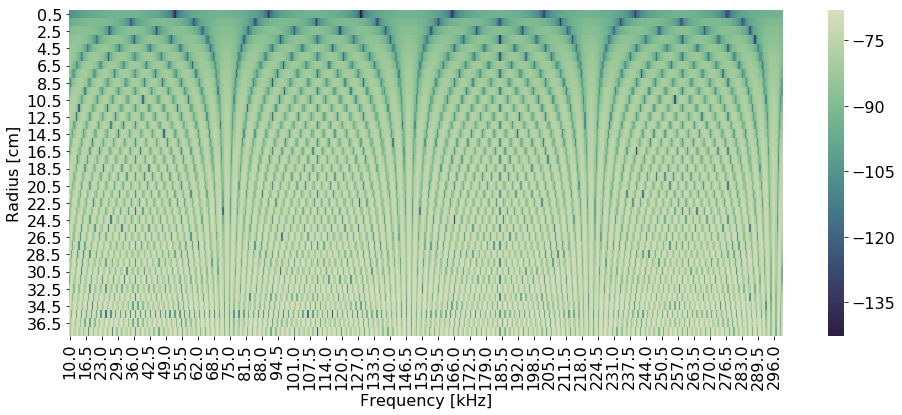

In [8]:
# create function with fixed a, c, h and g but variable f and r
def ts_map(x,y):
    return(fluid_sphere_simple(f=x,r=Range,a=y,c=c_w,h=h,g=g))
p,tel_sim  = ts_sim()

## Rigid Sphere

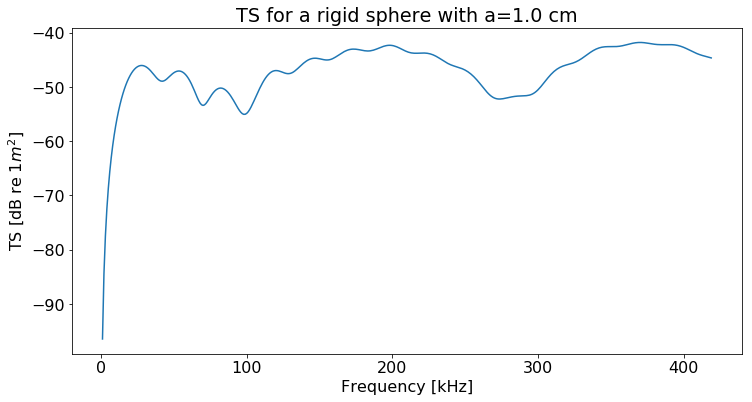

In [9]:
#single frequency
start = time.perf_counter()
rigid_sphere_simple(f=f,a=a,c=c_w)

#frequency range
start = time.perf_counter()
TS_py = [rigid_sphere_simple(f=x,a=a,c=c_w) for x in freqs]

#generate plot with matplotlib
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(freqs/1000, TS_py)
plt.xlabel("Frequency [kHz]")
plt.ylabel("TS [dB re 1$m^2$]")
plt.title("TS for a rigid sphere with a=%.1f cm"%(a*100))
plt.show()

### Simulation for a range of frequencies and radii

Evaluating the TS took 84.90 seconds for 22040 simulations


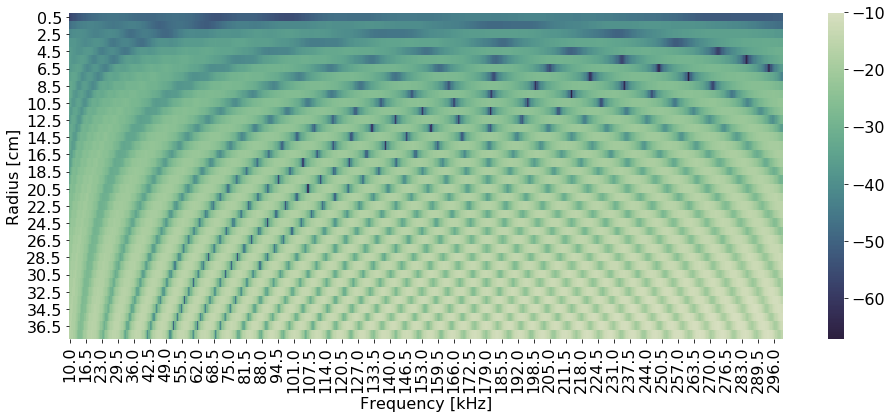

In [10]:
# create function with fixed c but variable f and a
def ts_map(x,y):
    return(rigid_sphere_simple(f=x,a=y,c=c_w))

p,tel_sim  = ts_sim()

## Pressure Release

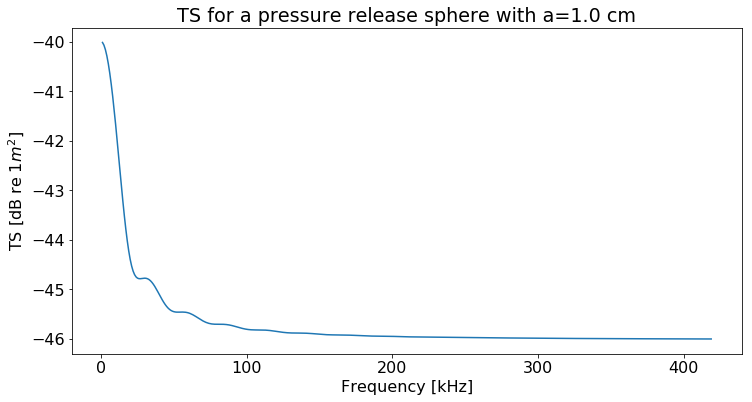

In [11]:
#single frequency
start = time.perf_counter()
TS_py = pressure_release_sphere_simple(f=f,a=a,c=c_w)
end = time.perf_counter()
tel_0 = end - start

#frequency range one sphere
start = time.perf_counter()
TS_py = [pressure_release_sphere_simple(f=x,a=a,c=c_w) for x in freqs]
end = time.perf_counter()
tel_0 = end - start

#generate plot with matplotlib
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(freqs/1000, TS_py)
plt.xlabel("Frequency [kHz]")
plt.ylabel("TS [dB re 1$m^2$]")
plt.title("TS for a pressure release sphere with a=%.1f cm"%(a*100))
plt.show()

### Simulation for a range of frequencies and radii

Evaluating the TS took 42.98 seconds for 22040 simulations


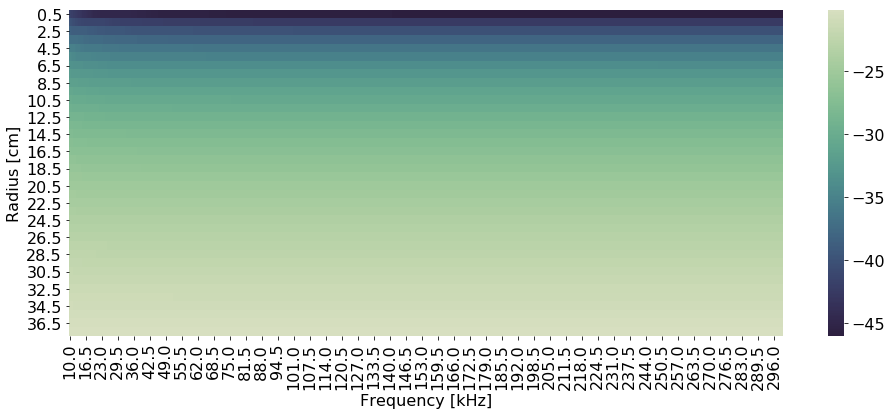

In [12]:
# create function with fixed c but variable f and a
def ts_map(x,y):
    return(pressure_release_sphere_simple(f=x,a=y,c=c_w))

p,tel_sim  = ts_sim()

In [ ]:
pressure_release_sphere_simple(f=f,a=a,c=c_w)